In [2]:
# Load the .CSV file of the waveform
import csv
import os

import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters
top_level=f'{os.getcwd()}/..'
path    = f'{top_level}/data/RefCurve_2023-10-26_2_185318.Wfm.csv'
size    = 20000 # Number of data points in the file
timeBin = 1E-1 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz

timeSteps = np.linspace(0, timeBin*(size-1), num=size)
wave_a = []
wave_c = []

with open(path) as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        values = row[0].split(';')
        if len(values) == 2:
            wave_a.append(float(values[0]))
            wave_c.append(float(values[1]))


print(len(wave_a))
print(len(wave_c))

20000
20000


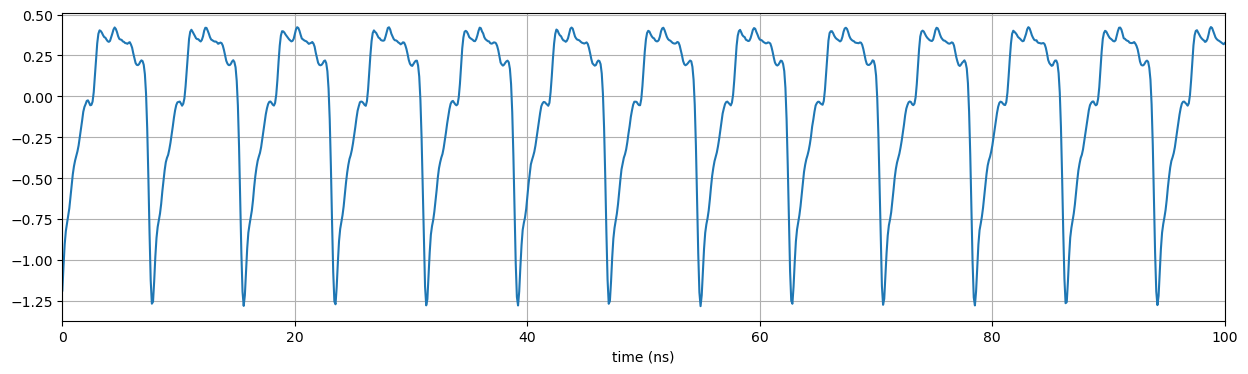

In [11]:
#wave A
t=np.arange(0,len(wave_a))*0.1
plt.figure(figsize=(15,4))
plt.plot(t,wave_a)
plt.xlim(0,100)
plt.grid()
plt.xlabel("time (ns)")
plt.show()

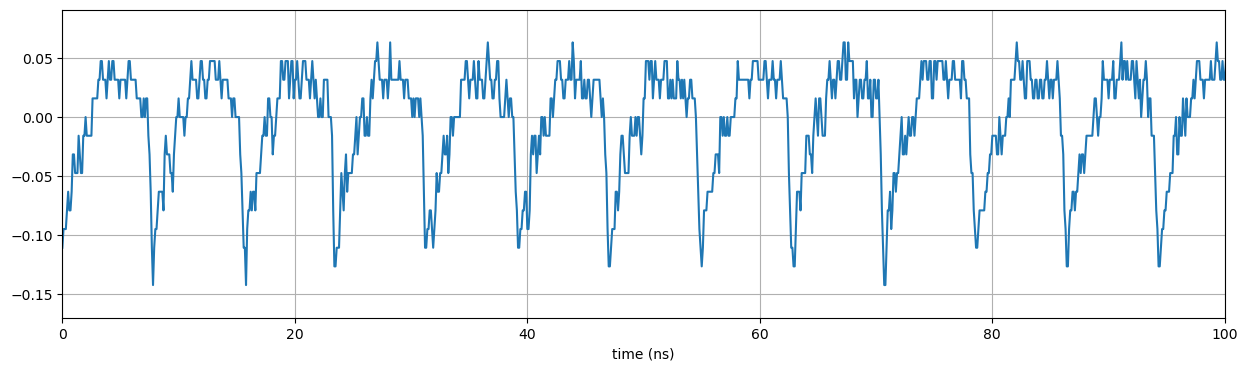

In [13]:
#wave C
t=np.arange(0,len(wave_c))*0.1
plt.figure(figsize=(15,4))
plt.plot(t,wave_c)
plt.xlim(0,100)
plt.grid()
plt.xlabel("time (ns)")
plt.show()

In [14]:
wave_a_hybrid = []
wave_ac_hybrid = []
path2    = f'{top_level}/data/RefCurve_2023-10-26_1_184845.Wfm.csv'
path3    = f'{top_level}/data/RefCurve_2023-10-26_0_184921.Wfm.csv'
with open(path2) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for i, row in enumerate(reader):
        wave_a_hybrid.append(float(row[0]))

with open(path3) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for i, row in enumerate(reader):
        wave_ac_hybrid.append(float(row[0]))

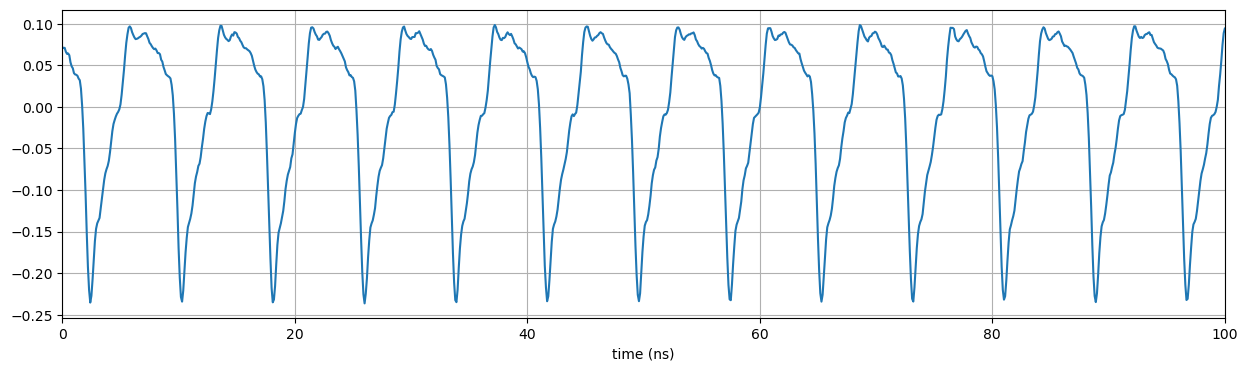

In [16]:
#wave A after hybrid
t=np.arange(0,len(wave_a_hybrid))*0.1
plt.figure(figsize=(15,4))
plt.plot(t,wave_a_hybrid)
plt.xlim(0,100)
plt.grid()
plt.xlabel("time (ns)")
plt.show()

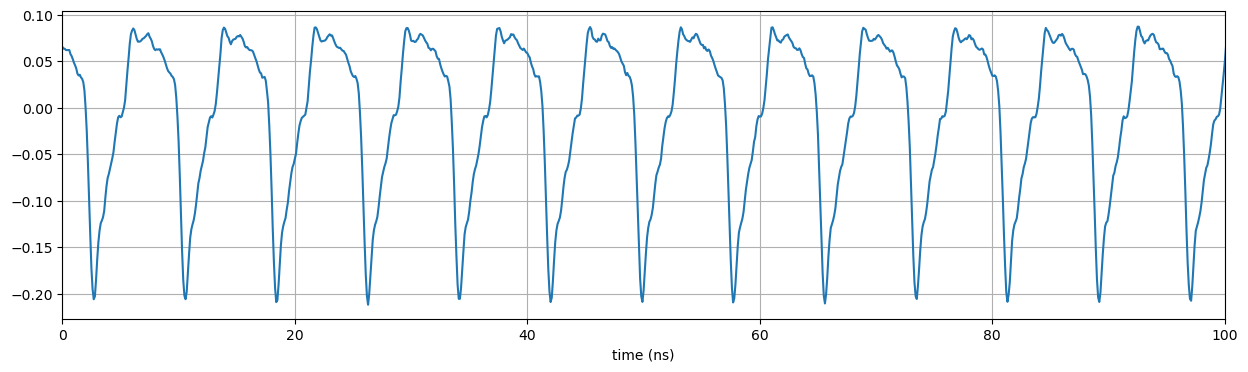

In [17]:
#wave A-C after hybrid
t=np.arange(0,len(wave_ac_hybrid))*0.1
plt.figure(figsize=(15,4))
plt.plot(t,wave_ac_hybrid)
plt.xlim(0,100)
plt.grid()
plt.xlabel("time (ns)")
plt.show()

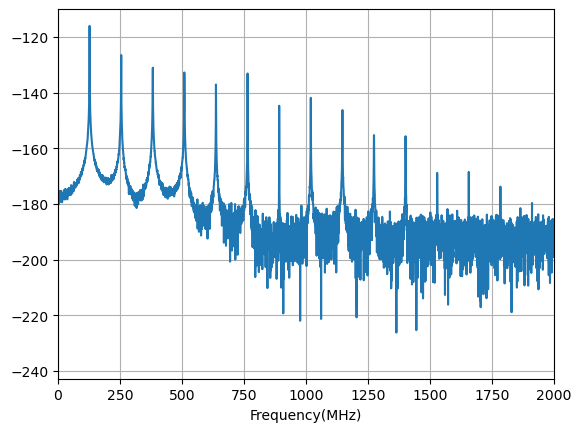

In [19]:
#FFT
size=len(wave_ac_hybrid)
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(wave_ac_hybrid)/float(len(wave_ac_hybrid))
freq = freq[range(len(wave_ac_hybrid)//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS
plt.plot(freqSteps,mag)
plt.xlabel("Frequency(MHz)")
plt.xlim(0,2000)
plt.grid()